# The Data

## Task: Classify songs by Genre

1. Blues
2. Classical
3. Country
4. Disco
5. Hiphop
6. Jazz
7. Metal
8. Pop
9. Reggae
10. Rock

# Audio Labels are Semi-ambiguous

Example Audio files located Here:
http://voxogram.com/voxstudy/index.php/2015/10/28/user-specific-genre-classification/

### Step 1 : Getting the data 

insert clickable link to github here 

In [ ]:
workingdir = '/Users/Ted/Documents/__G2_Spring/__COS_424/'
!cd {workingdir} 
!git clone https://github.com/grgliner/voxResources.git

# Loading Data directly into Python

In [14]:
import sys
import random
import scipy.io as spio
import numpy as np

fileN = '/Users/Ted/Documents/__G2_Spring/__COS_424/voxResources/data/country/country.00009.mat'
X = spio.loadmat(fileN)

# We also have a script that creates CSV files for each feature 

In [28]:
!python /Users/Ted/Documents/__G2_Spring/__COS_424/voxResources/tools/MAT2CSV.py {fileN}
!ls '/Users/Ted/Documents/__G2_Spring/__COS_424/voxResources/data/country/'

Value not of recognized type
country.00000.mat                        country.00023.mat                        country.00062.mat
country.00001.mat                        country.00024.mat                        country.00063.mat
country.00002.mat                        country.00025.mat                        country.00064.mat
country.00003.mat                        country.00026.mat                        country.00065.mat
country.00004.mat                        country.00027.mat                        country.00066.mat
country.00005.mat                        country.00028.mat                        country.00067.mat
country.00006.mat                        country.00029.mat                        country.00068.mat
country.00007.mat                        country.00030.mat                        country.00069.mat
country.00008.mat                        country.00031.mat                        country.00070.mat
country.00009.mat                        country.00032.mat             

# Features




In [3]:
# 'stat' 'env' 'eng' 'mfc' 'chroma' 'centers' 'other' 'class' 'class_name' 'filename'
X['OPUS']['stat']

array([[ array([[ ([[76.94544554011831, 97.59039131064121, 140.76653796453948, 142.73062772678364, 113.18176626933918, 120.57735138457784, 107.16110383360962, 76.85333423157559, 65.23814149053865, 65.07498871554658, 68.8865606515156, 75.78696609781441, 58.19830565390733, 70.5204445137447, 82.36367354008934, 83.2997406740314, 67.54559323397227, 77.61952418970822, 63.46467290738275, 57.37585447169824, 59.51146525342787, 60.909552943166624, 73.48859702504308, 54.546241912239914, 42.94064559714794, 59.66020767869812, 80.29722873752839, 202.45854786389947, 138.85851182467025, 140.68155645929323, 154.81709276772034, 77.35498921239437, 71.73294632984793, 79.95756631251967, 90.08384476884213, 82.46483368726837, 84.44833187098412, 91.10810846907636, 93.74494260532504, 72.93430131655253, 76.98086715040323, 76.00108866814023, 70.99957592778865, 42.68756172215036, 59.57436096483401, 85.6743128421918, 79.3995861677325, 84.90816624550754, 61.46666355673391, 55.78027314139348, 100.32671977554949, 144

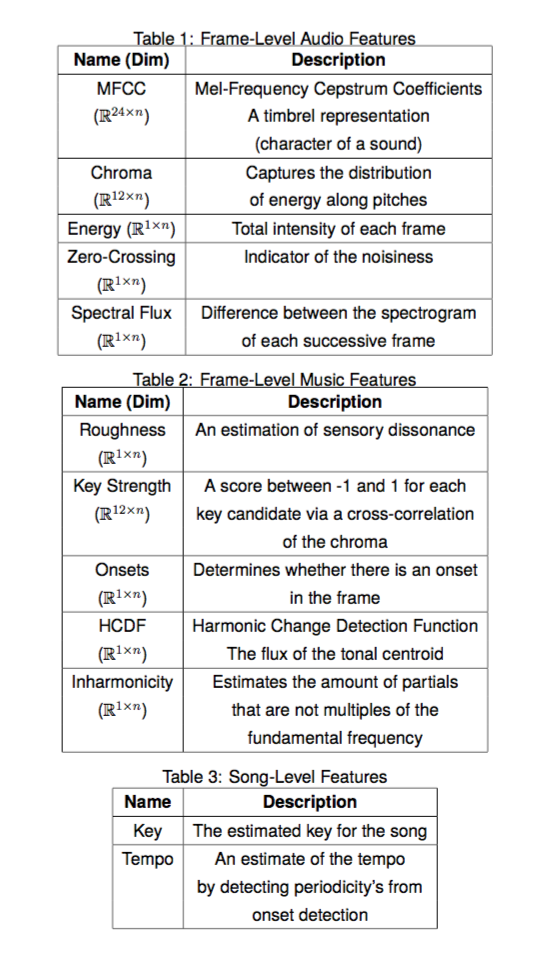

In [1]:
## This is for an `png` image
from IPython.display import Image
fig = Image(filename=('/Users/Gazelle/Downloads/featureTable.png'))
fig

# Ted's Talk

these are matrices, you need vector vanilla approach doesn't work (we demo SVM results) 

# Sample workflow for Exemplar and Fisher Vector

In [4]:
%%writefile /Users/Gazelle/Downloads/FV_demo.m

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% Fv_demo
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%Change this to the directory containing your data folder
dirn = '/Users/Gazelle/Documents/voxResources';

%add tools path
run('/Users/Gazelle/Documents/MATLAB/vlfeat-0.9.20/toolbox/vl_setup')
addpath(genpath('/Users/Gazelle/Documents/voxResources/tools'))


[DAT, LB, FNS] = loadAll(dirn);

%extract the MFCC

mfcc = cell(1,1000);

for i = 1:length(DAT)
    #making smaller matrices so my computer can run the code
    tmp = DAT{i}.mfc[:,1:500];
    tmp(isnan(tmp)) = 0;
	mfcc{i} = tmp; 

end

%create the structure used as input into the demo_fv

GENDATA.data = mfcc;

GENDATA.class = LB;

GENDATA.classnames = {'Blues', 'Classical', 'Country', 'Disco', 'Hiphop',...

	'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock'};


%run fisher vector

FV = demo_fv(GENDATA, 3, 3)

Overwriting /Users/Gazelle/Downloads/FV_demo.m


# Main Point

3 types data you can use

1. Raw digital files
2. FV/Exemplar feature extraction
3. Extract your own features from the raw audio files (independent work)

# PT 2: Classifier Demos

In [45]:
# actual import mfcc from FV
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
mfcc = X['OPUS']['mfc'][0][0]
N = mfcc.shape[1]
labels = np.array([i % 3 for i in range(0,N)])

maxLearners = 100
maxDepth = 5
TEidx = np.array(random.sample(range(0,N), N/10))
X_TE = mfcc[:,TEidx]
X_TR = mfcc[:,[i for i in range(0,N) if i not in TEidx]]
Y_TE = labels[TEidx]
Y_TR = labels[[i for i in range(0,N) if i not in TEidx]]
rf = RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False)
rf.fit(X_TR.T,Y_TR)
predictionsRF = rf.predict(X_TE.T)
errorRF = zero_one_loss(predictionsRF, Y_TE)
errorRF

0.68333333333333335

In [47]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_TR.T,Y_TR)
predictionsKNN = knn.predict(X_TE.T)
errorKNN = zero_one_loss(predictionsKNN, Y_TE)
errorKNN

0.71666666666666667